# Week 6 Decision Trees

## Learning objectives
By the end of this module, you will be able to:
1. Explain each component in a decision tree.
3. Make a prediction for a data point given a decision tree.
2. Explain the advantages of decision trees.
3. Create a decision tree for a dataset by using `sklearn' in Python.
4. Adjust decision tree parameters for a specific use case.

### Introducing Decision Trees

A Decision Tree is a popular supervised learning method that aims to make predictions through a series of decisions or questions, creating a branching structure of decisions. Building a decision tree entails developing a set of questions for the input data to answer.

Decision Trees are commonly used for **classification** and **regression** tasks. A classification task predicts the value of a discrete, categorical variable, for example, determining if a patient has a particular disease given the results of a complete blood count. In contrast, a regression task predicts the value of a continuous variable, such as predicting the concentration of a protein given the expression levels of a set of genes.


Let's start with some definitions:
- <span style="background-color: #AFEEEE">**Decision Node**</span>: Each decision node looks at a feature and asks a true/false question regarding the value of the feature (commonly whether or not the feature is below a certain value). Depending on the answer to the question, we will choose a branch to follow. For example, we could ask if `age <= 0.25`. If this condition is met, we will go to the left branch, otherwise, we will go to the right branch. These are also called internal nodes. One special case of an internal node is the **root node**, which is the topmost node of the tree where *all* points start.
- <span style="background-color: #AFEEEE">**Leaf Node**</span>: Leaf nodes are the nodes of the tree where all samples reach after a series of decision nodes. Leaf nodes do not "ask a question" but rather assign a prediction to the sample. In classification tasks, this is the class of the sample (eg. true or false, type of gene, etc.). For regression tasks, this is a real value.
- <span style="background-color: #AFEEEE">**Branch**</span>: Branches connect all nodes together. Each branch corresponds to the answer to the question of the node above (`True` or `False`).
- <span style="background-color: #AFEEEE">**Node Depth**</span>: The depth of a node is equal to the number of decisions it takes to reach that node + 1. For example, the depth of the root node is 1 as no decision is made before it (0 + 1).
- <span style="background-color: #AFEEEE">**Tree Depth**</span>: The depth of the tree is equal to the depth of the deepest internal node.   


Here is a diagram of the structure of a decision tree with each component labelled:

![elements of a decision tree](images/element_of_decision_tree.jpg)



#### **Real-life Example**
Recall that in HMB201, we used a dataset on heart failure patients, containing data on 299 patients' characteristics such as age, sex, and whether they smoke (i.e., features), and also containing whether or not the patient died from heart failure.

Using the dataset, we trained a decision tree that aims to predict death in heart failure patients. The tree is used to make a binary decision given a patient's features. The tree is visualized below.

![name](images/heart_failure_decision_tree.png)



Each node in the diagram has 3-4 pieces of information:
1. Decision Rule (not present in leaf nodes)
2. Number of samples reaching the node
3. Number of samples in each class (No Death, Death)
4. Majority class of points reaching that node.

Let's look at the root node as an example:

![picture labels](images/root%20node.png)

  - **serum_creatinine <= 1.815**: The decision rule applied at this node. It splits the data based on whether a patient's `serum_creatinine` is less than or equal to 1.815. If yes, the patient follows the `True` branch; otherwise, it follows the `False` branch.
  - **samples = 299**: The total number of samples that reached this node. With no splitting yet, there are 299 patients in the dataset.
  - **value = [203, 96]**: The distribution of these samples among the classes at this node. Among the 299 samples, 203 patients belong to the class "No Death" and 96 patients belong to the class "Death"
  - **class = No Death**: The majority class of all the samples that reached this node. If the node is a leaf node, then the majority class represents the predicted class for all the samples that reached the node.

We can also see that this tree's depth is 3 since we have three decision nodes at depth 3.

Consider a particular data sample representing a patient. To predict whether the patient died of heart failure, we pass the data sample to the root node. The data sample is routed through the tree by answering the questions at each node, and eventually reaches a leaf node with a final prediction.

A patient of `serum_creatinine = 1.700`, `ejection_fraction = 26.0`, `serum_sodium = 120.5` would be predicted as "Death" in the tree. When the patient's features vector is passed through the tree, the patient would always follow the `True` branch and end up in the leftmost leaf node.

##### **Q1: You are given a patient with the specified values for each of the dataset features below. Using this and the generated decision tree, classify the patient as either "Death" or "No Death". Describe the path you took to get to the answer.**
  - `anaemia`: 1
  - `age`: 50
  - `creatinine_phosphokinase`: 1.650
  - `diabetes`: 0
  - `ejection_fraction`: 29.4
  - `high_blood_pressure`: 1
  - `platelets`: 	263358.03
  - `serum_sodium`: 1.1
  - `sex`: 0
  - `smoking`: 1
  - `serum_creatine`: 1.8


<span style="background-color: #FFD700">**Write your answer below**</span>

Answer: No Death; Left, Right, Left

#### **Advantages of Decision Trees**

Decision trees are a popular method in machine learning and data analysis. Here are some key benefits:

- **Interpretability**: They are easy to understand and interpret, even for non-experts. Understandable models are essential for research and diagnosis in clinical settings. In contrast, other machine learning models, such as neural networks, are much more challenging to interpret.

- **Feature Importance**: A good decision tree can naturally indicate which features are most influential in making predictions. For example, the decision tree above uses `serum_creatinine` in multiple nodes, suggesting that this feature is crucial for predicting death in heart failure patients.

- **Versatility**: Suitable for both classification and regression tasks.

- **Handles Non-linear Relationships**: Can capture non-linear relationships between features and target variables.

- **Can Deal with Missing Values**: They can handle missing data points without requiring extra preprocessing.

### Building Decision Trees for Heart Failure Dataset

In the previous section, we showed a decision tree for the heart failure dataset. In this section, we will go through the code used to train and visualize this tree.

Let's begin by importing the necessary libraries and the heart failure dataset that was used above.

**Step 1: Load the Dataset**

In [1]:
import pandas as pd       # For processing tabular data
from sklearn.tree import DecisionTreeClassifier  # For training a decision tree
df = pd.read_csv('heart_failure_data_tut.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1.0,265000.00,1.9,130,1,0.0,1
1,55.0,0,7861,0,38,0.0,263358.03,1.1,136,1,0.0,1
2,65.0,0,146,0,20,0.0,162000.00,1.3,129,1,1.0,1
3,50.0,1,111,0,20,0.0,210000.00,1.9,137,1,0.0,1
4,65.0,1,160,1,20,0.0,327000.00,2.7,116,0,0.0,1


Each row in the table above represents a patient, detailing various characteristics of the patient (i.e. the features), and also whether or not the patient died of heart failure

We include the list of features below as a reminder:
  - `anaemia`: which is binary 1=true, 0=false
  - `age`: ages in year
  - `creatinine_phosphokinase`
  - `diabetes`: which is binary 1=true, 0=false
  - `ejection_fraction`
  - `high_blood_pressure`
  - `platelets`
  - `serum_sodium`
  - `sex`
  - `smoking`

We will be using these features to predict the value in the `DEATH_EVENT` column:
-  `DEATH_EVENT`: A report that if the heart failure patient died (1=yes, 0=no).


**Step 2: Process the raw data**

Next, we will use the variable `X` to store the input features, which are all the information except the `DEATH_EVENT` column.

In [2]:
# Separating features and target
X_hf = df.drop(columns=['DEATH_EVENT'])

# y is the target of the dataset
y_hf = df['DEATH_EVENT']

X_hf.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,75.0,0,582,0,20,1.0,265000.00,1.9,130,1,0.0
1,55.0,0,7861,0,38,0.0,263358.03,1.1,136,1,0.0
2,65.0,0,146,0,20,0.0,162000.00,1.3,129,1,1.0
3,50.0,1,111,0,20,0.0,210000.00,1.9,137,1,0.0
4,65.0,1,160,1,20,0.0,327000.00,2.7,116,0,0.0


**Step 3: Train a Decision Tree**

Next, we will create a decision tree using the `DecisionTreeClassifier` provided by `sklearn`.The documentation about this model contains information about the parameters of the tree and can be found at the following link: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html. We will learn a bit about the important parameters later.


Remember, the pipeline for model development in sklearn is **initialize->fit->predict**.

In [3]:
# Create a decision tree that has a maximum depth of 3
dec_tree = DecisionTreeClassifier(random_state=1, max_depth=3)
# Train a decision tree
dec_tree.fit(X_hf, y_hf)

DecisionTreeClassifier(max_depth=3, random_state=1)

**Step 4: Visualize a Decision Tree**

We have included a function `visualize_tree`, which plots a decision tree.

In [4]:
# Import Libraries for Plotting
import graphviz
from IPython.display import display
from sklearn import tree

def visualize_tree(model, feature_names: list[str], class_names: list[str]):
  """
  Generate an image that visualizes a Sklearn Decision

  See here: https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

  Parameters:
      `model` - A Sklearn decision tree model
      `feature_names` - List of feature names for the data sample in the dataset
      `class_names` - List of class labels/targets in the dataset
  """
  dot_data = tree.export_graphviz(model,
                                      feature_names=feature_names,
                                      class_names=class_names,
                                      filled=True,
                                      rounded=True,
                                      impurity=False
                                  )
  return display(graphviz.Source(dot_data))

To use the function `visualize_tree`, we need to pass 3 input parameters:

  - **model**: the decision tree model we want to visualize
  - **feature_names**: a list of input features. In this case, it is `["age", "anaemia", "creatinine_phosphokinase", "diabetes", ...]`
  - **class_names**: a list of classes. In this case, it is `["Death", "No Death"]`

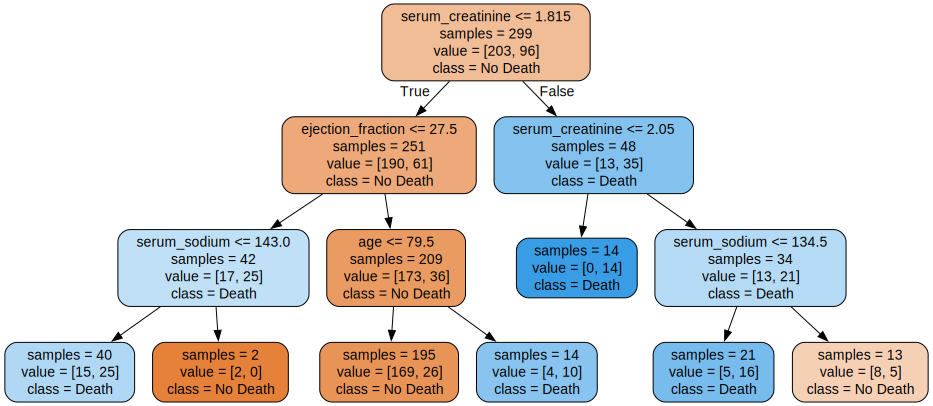

In [5]:
# Fill the input to the function
visualize_tree(dec_tree, list(X_hf.columns), ["No Death", "Death"])

### Building Decision Trees for Differentially Expressed Genes (DEGs)

Now that we have demonstrated how to train a tree on the Heart Failure dataset, it's your turn to try and train one yourself. You will use the **gene expression dataset of asthma patients** to train a decision tree and predict whether an asthma patient took the medication by looking at their gene expression.

The decision tree will identify the DEGs. The goal is to identify genes that can differentiate between the treatment group and the control group, potentially revealing key genes influenced by the medication.


**Step 1: Load the Dataset**

The dataset contains gene expression data from the smooth muscle tissue of the airways in asthma patients. This dataset includes two groups: a treatment group that has received the asthma medication dexamethasone, and a control group of asthma patients who have not received any medication. The dataset comprises eight samples, with four samples per group.

Below, we read in and pre-process the dataset

In [6]:
import pandas as pd
data = pd.read_csv("airway_rawcounts.csv")
data = data.set_index("ensgene")

# Step 1: calculating the sum of counts per gene
row_sums = data.sum(axis=1)

# Step 2: filter the DataFrame to retain only rows with nonzero total counts
data = data[row_sums > 0]
# Transpose the DataFrame because it is assumed each row is a data sample
data = data.T
metadata = pd.DataFrame({
    'Condition': ['C', 'T', 'C', 'T', 'C', 'T', 'C', 'T']}, index=data.index)
X = data
# Create a list of prediction results for the training dataset
y = metadata['Condition'].values
print(X.shape, y.shape)

(8, 33469) (8,)


**Q2: Train a decision tree on the DEG data and visualize it. What is the number of decision nodes in this tree, and what gene does the root node split on? What does the selected gene in the decision node mean?**

<span style="background-color: #FFD700">**Complete the code cell below**</span>

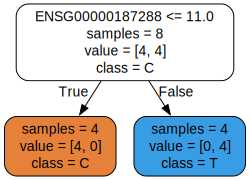

In [7]:
## YOUR TURN
dtree = DecisionTreeClassifier()
dtree.fit(X, y)
visualize_tree(dtree, list(X.columns), ["C", "T"])

<span style="background-color: #FFD700">**Write your answer below**</span>

Answer: There is only 1 decision node. It means that the decision tree determines if a patient is in the control or treatment group by only looking at ENSG000000123610. This specific gene is the key factor that drives the predictions.

As you can see, the code for training a decision tree is quite simple. However, there are lots of things happening behind the scenes.

### Decision Tree Training
The core idea behind Decision Tree is to recursively split the dataset into smaller subsets using a decision rule. How does the algorithm decide which feature to select? To understand this, we need to understand the concept of **entropy**.

#### **Entropy**
Entropy is a measure of the amount of uncertainty in the data. Intuitively, for a classification problem, we can understand it as "if we were to randomly select a point, how confident are we that we know what the point will be."

Consider the following groups:

![name](images/week%206%20entropy%20graph%201.png)


If we were to randomly select a data point from Group A, we have a 2/3 chance of the point being green and a 1/3 chance of it being purple, therefore, we can say we are relatively confident that a point chosen from Group A will be green. However, in Group B, there is a 50/50 chance that the point will be green or purple, therefore, we are not confident that we can predict the result of randomly choosing a point. In this case, we can say that Group B has a *higher entropy* than Group A.

A group has zero entropy if there is only one class in the group.

#### **Splitting with Entropy**

A decision tree uses entropy to make decisions. At each internal node, the decision tree examines the points that have reached it and chooses a decision rule that creates two subgroups with low entropy. Given a set of points, the decision tree will generate a few candidate decision rules that split the space. **The tree will choose the split that reduces entropy the most**.


**Q3: Below, we plot two different candidate splits. Which split will the decision tree choose: Candidate 1 or Candidate 2? Justify your answer.**

![exm](images/candidate_splits.png)

<span style="background-color: #FFD700">**Write your answer below**</span>

Answer: Split 1 as the left side becomes completely pure (zero entropy), and the right side isolates orange points.



#### **Step-by-Step Construction**
Decision tree construction is done in a step-by-step manner, starting with the root node. The algorithm can be summarized as follows:

1. Observe the group of data points and create a set of candidate decision rules.
2. Choose the decision rule that reduces entropy the most and add it to the tree as an internal node. We can then split the group into two groups.
3. Looking at the two new groups, pick the group that has the most entropy and repeat steps 1 and 2.
4. If we cannot split up the two groups further, add leaves to the tree with the majority class of each node. Then move on to another set of groups and repeat steps 1-4.

We then simply repeat the above procedure until various stopping conditions are met.

#### **Splitting Stopping Conditions**

There are various conditions in which a node cannot be split, but the main ones are the following:
1. **Maximum Tree Depth:** The node we have added has hit the maximum depth we allow.
2. **Not Enough Samples**: We cannot split up the space if there are not enough points to create two splits that have a certain number of points. For example, if we split the sample, and one split only has one sample, we may not accept that split.
3. **No Reduction in Entropy**: The resultant groups from the split are already pure, and there is no possible reduction in entropy that will result from adding a new split.

We can customize these stopping conditions through various hyperparameters.
1. `max_depth`: This hyperparameter controls how deep the tree can go.
2. `min_samples_leaf`: The minimum number of samples that should reach a leaf.
3. `min_impurity_decrease`: The minimum entropy reduction needed to justify a split.


#### **Stopping Conditions and Overfitting**
One problem we often have in machine learning is the problem of **overfitting**. Overfitting is a situation in machine learning where a model becomes too complex and captures not only the true patterns in the training data but also the noise and outliers. As a result, **the model performs exceptionally well on the training data but struggles to generalize to new, unseen data,** leading to poor performance in real-world applications.

Since decision trees are very flexible, they can easily create many splits that perfectly classify the training data. However, these splits may be based on patterns that do not hold in other data sets, leading to a model that is too specialized. When a decision tree overfits, it may have many branches and leaf nodes, capturing subtle and irrelevant distinctions that don't generalize beyond the training set. Each hyperparameter above allows us to limit this problem.

To identify overfitting, we often split our data into two different sets:
* Training set: This is the data our model sees and trains on.
* Testing set: We create this set by removing data from the training set, making sure the model never sees these samples.

We split the heart failure dataset into the train and test sets below:

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_hf, y_hf, test_size=0.2, random_state=42)

##### **Max Depth:**

The first parameter used to control overfitting is `max_depth`. Since every extra depth of the tree doubles the number of leaves, a sufficiently deep tree eventually assigns each training sample to its own leaf. This over-complexity tends to fit into noise instead of actual trends.

**Q4: Test two different values of max_depth, one small tree (<= 3) and one large tree (>=5), and report the train AND test accuracy for both trees. Which depth do you think is overfitting and why?**
> Hint: Try using the clf.score(...) built into the decision tree classifier or the accuracy_score function from sklearn metrics.

<span style="background-color: #FFD700">**Complete the code cell below**</span>

In [9]:
## Your Code Here
dt1 = DecisionTreeClassifier(max_depth=3)
dt1.fit(X_train, y_train)
print(dt1.score(X_train, y_train))
print(dt1.score(X_test, y_test))

0.8117154811715481
0.7333333333333333


In [14]:
## Your Code Here
dt2 = DecisionTreeClassifier(max_depth=10)
dt2.fit(X_train, y_train)
print(dt2.score(X_train, y_train))
print(dt2.score(X_test, y_test))

0.9916317991631799
0.6666666666666666


<span style="background-color: #FFD700">**Write your answer below**</span>

Answer: The second one is overfitting because the accuracy for the training set is exceptionally high, while the accuracy is not good enough for the testing set. / There is a wide accuracy gap between the training set and the testing set.

##### **Minimum Samples Per Leaf**
Another way to avoid overfitting is to specify that there must be more than one point in each leaf. This will force the tree to focus on patterns that appear multiple times, making it more robust to noise. This also prevents deep trees from assigning 1 leaf per point. Below we try two different values for a tree of `max_depth` 10.

In [15]:
dt1 = DecisionTreeClassifier(min_samples_leaf=1, max_depth = 10)
dt1.fit(X_train, y_train)
print(dt1.score(X_train, y_train))
print(dt1.score(X_test, y_test))

0.9916317991631799
0.6833333333333333


In [16]:
dt1 = DecisionTreeClassifier(min_samples_leaf=4, max_depth = 10)
dt1.fit(X_train, y_train)
print(dt1.score(X_train, y_train))
print(dt1.score(X_test, y_test))

0.9037656903765691
0.7


**Q5: When we increased the minimum samples per leaf, what trends did you observe in the training and testing accuracy?**

<span style="background-color: #FFD700">**Write your answer below**</span>

Answer: Increase in testing accuracy, decrease in training accuracy.


##### **Minimum Reduction in Entropy**
While the goal of each node is to reduce entropy in each split, sometimes to promote generalization, we don't want to completely purify a given split, as sometimes data can be noisy in real life. To control this, we set the `min_impurity_decrease` parameter. If the split isn't "strong enough," the tree won't make the split. Below, we increase the `min_impurity_decrease` value from 0.0 to 0.01 for a very deep tree. Notice how the training accuracy significantly decreased, but the testing accuracy significantly increased.


In [17]:
dt1 = DecisionTreeClassifier(min_impurity_decrease = 0.00, max_depth=10)
dt1.fit(X_train, y_train)
print(dt1.score(X_train, y_train))
print(dt1.score(X_test, y_test))

0.9916317991631799
0.6333333333333333


In [18]:
dt2 = DecisionTreeClassifier(min_impurity_decrease =0.01, max_depth = 10)
dt2.fit(X_train, y_train)
print(dt2.score(X_train, y_train))
print(dt2.score(X_test, y_test))

0.8117154811715481
0.7333333333333333


## **Graded Exercise: (5 marks)**

**GQ1 (2 marks): In the cell below, we load in the breast cancer dataset for you. Fit decision trees with depths between 1-6 (1,2,...,6) and plot the training and testing accuracies for each tree. Do any of the trees overfit, and if so, at what depth?**

<span style="background-color: #FFD700">**Write your code below**</span> 

In [19]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
feature_names = data.feature_names


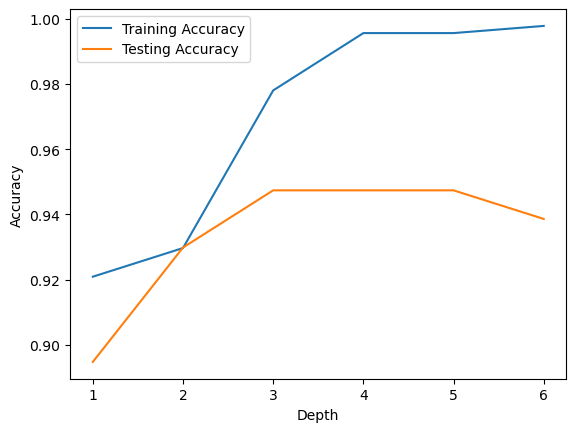

In [20]:
depths = range(1, 7)
# Loop through different depths and collect the train and test accuracy
train_accs = []
test_accs = []

# YOUR CODE HERE: fit decision trees with depth in depths
for max_depth in depths:
  dec_tree = DecisionTreeClassifier(random_state = 42, max_depth=max_depth)
  dec_tree.fit(X_train, y_train)
  train_accs.append(accuracy_score(y_train, dec_tree.predict(X_train)))
  test_accs.append(accuracy_score(y_test, dec_tree.predict(X_test)))

# YOUR CODE HERE: plot the training and testing accuracies across depths
plt.plot(depths, train_accs, label="Training Accuracy")
plt.plot(depths, test_accs, label="Testing Accuracy")
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

<span style="background-color: #FFD700">**Write your answer below**</span>

Answer: The Best Depth is 3-5 (because it reaches the highest testing accuracy). The tree starts overfitting at depth 6 because the test accuracy starts to drop.


**GQ2 (2 marks): From the above question, pick the decision tree with the highest testing accuracy and visualize it. What feature does the tree split on at the root node? Additionally, how many leaf nodes are there?**

<span style="background-color: #FFD700">**Write your code below**</span> 


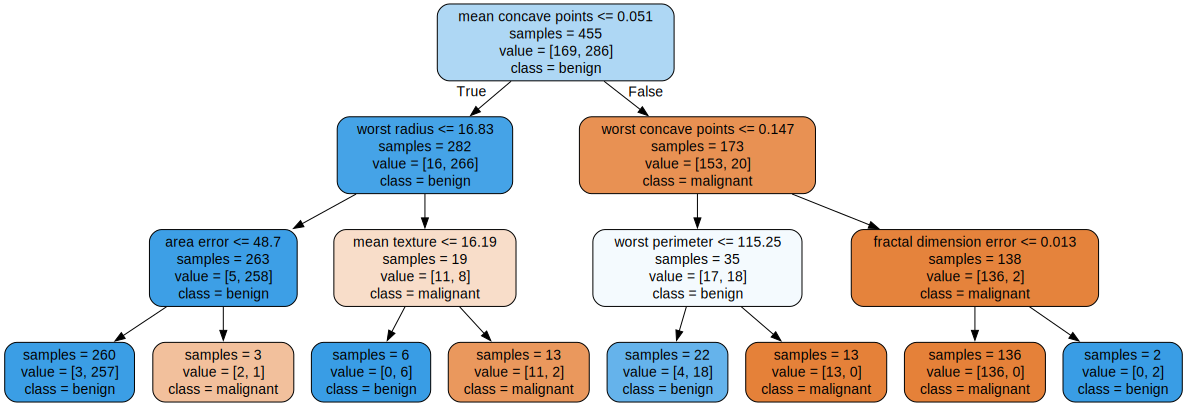

In [21]:
dec_tree = DecisionTreeClassifier(random_state = 42, max_depth=3)
dec_tree.fit(X_train, y_train)
visualize_tree(dec_tree, feature_names, data.target_names)

<span style="background-color: #FFD700">**Write your answer below**</span>

Answer: Mean Concave Points, 8 leaves.


**GQ3 (1 mark): Nick has a dataset with 500 *unique* training points, and he fits a tree with the following parameters and achieves 100% training accuracy. Should Nick be happy with these results? If not, what does Nick need to do to confirm that his tree is good?**

* Min Depth: 8
* Min Samples per Leaf: 1
* Min Entropy Decrease: 0.0


<span style="background-color: #FFD700">**Write your answer below**</span>

Answer: No, Nick should be cautious, as those hyperparameters allow for one leaf per data point, and the resulting tree might be overfitting.


## Conclusion

In conclusion, decision trees are powerful and intuitive tools in machine learning that offer both flexibility and interpretability. By iteratively splitting data based on feature values, decision trees can model complex relationships and make predictions for both classification and regression tasks. Additionally, the ability of a tree to be visualized and easily interpreted makes it a powerful analytic tool in your toolbox.

However, with this flexibility comes the risk of overfitting, where the model becomes too tailored to the training data and loses its ability to generalize to new data. To prevent this, various parameters can be modified to help adjust the tendency of a tree to fit into noise. Understanding the balance between complexity and generalization is key to effectively using decision trees. With this knowledge, you can confidently apply decision trees to a wide range of problems, making them a valuable tool in your machine learning toolkit.